In [24]:
from scipy.special import binom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import choice
from tqdm import tqdm_notebook
from scipy.stats import pearsonr, norm
from sklearn.neighbors import KernelDensity
import matplotlib
%matplotlib inline

## 1

Ура, идем дальше

## 2

$T_n = \overline{X_n}^2$

$\hat{\alpha_k} = \dfrac{1}{n} \sum_{i} (X_i - \overline{X_n})^k$

Доказать, что $$v_{boot} = \dfrac{4 \overline{X_n}^2 \hat{\alpha_2}}{n} + \dfrac{4\overline{X_n} \hat{\alpha_3}}{n^2} + \dfrac{\hat{\alpha_4}}{n^3} + \dfrac{(2n-3)\hat{\alpha_2}^2}{n^3}$$

Заметим, что $\hat{\alpha_1} = \sum_i \dfrac{1}{n} (X_i - \overline{X_n}) = 0$

Будем писать вместо $\hat{\alpha_k}, \ \alpha_k$, потому что это сокращает время теханья на 40 лет

То есть $\overline{X_n} = \overline{X_n} + \alpha_1$

Из лекции знаем, что $D_{F} T_n \approx D_{\hat{F}} T_n \approx v_{boot}$

Поэтому будем искать $D_{\hat{F}} T_n = E_{\hat{F}} T_n^2 - (E_{\hat{F}} T_n)^2$

$$E_{\hat{F}} T_n^2 = E_{\hat{F}} \overline{X_n}^4 = E (\overline{X_n} + \alpha_1)^4 = E(\alpha_1^4 + 4\bar{X}_n\alpha_1^3 + 6\bar{X}_n^2\alpha_1^2 + 4\bar{X}_n^3\alpha_1 + \bar{X}_n^4)$$

Знаем, что $E_{\hat{F}} \bar{X}_n = \bar{X}_n$ (по ЗБЧ)

$$E(\alpha_1^4) + 4\bar{X}_nE(\alpha_1^3) + 6\bar{X}_n^2E(\alpha_1^2) + 4\bar{X}_n^3E0  + \bar{X}_n^4 = E(\alpha_1^4) + 4\bar{X}_nE(\alpha_1^3) + 6\bar{X}_n^2E(\alpha_1^2) + \bar{X}_n^4 $$

Будем считать по кускам:

$$E(\alpha_1^4) = E \left(\sum_i \dfrac{1}{n^4} (X_i - \overline{X_n})\right)^4 = \dfrac{1}{n^4}E \left(\sum_i  (X_i - \overline{X_n})\right)^4 $$

Поймем, что такое $\left(\sum_i  (X_i - \overline{X_n})\right)^4$ (прости, Тимур)

$$\left(\sum_i  (X_i - \overline{X_n})\right)^4  = \sum_{i_1} \sum_{i_2} \sum_{i_3} \sum_{i_4} (X_{i_1} - \overline{X_n})(X_{i_2} - \overline{X_n}) (X_{i_3} - \overline{X_n}) (X_{i_4} - \overline{X_n}) = 
\sum_{i}(X_{i} - \overline{X_n})^4 + \sum_i \sum_{j \neq i} (X_i - \overline{X_n})^3 (X_j - \overline{X_n}) +
\sum_{i}\sum_{j \neq i} \sum_{k \neq i, k \neq j} (X_i - \overline{X_n})^2 (X_j - \overline{X_n})(X_k - \overline{X_n}) + \sum_{i}\sum_{j \neq i} (X_i - \overline{X_n})^2 (X_j - \overline{X_n})^2+ \sum_{i}\sum_{j \neq i} \sum_{k \neq i, k \neq j} \sum_{l \neq k, l \neq j, l \neq i}(X_i - \overline{X_n})(X_j - \overline{X_n})(X_k - \overline{X_n})(X_l - \overline{X_n}) $$

$$c_1 \sum (X_{i} - \overline{X_n})^4 + c_2 \sum (X_i - \overline{X_n})^3 (X_j - \overline{X_n}) + c_3 \sum (X_i - \overline{X_n})^2 (X_j - \overline{X_n})(X_k - \overline{X_n}) + c_4 \sum (X_i - \overline{X_n})^2 (X_j - \overline{X_n})^2 + c_5 \sum (X_i - \overline{X_n}) (X_j - \overline{X_n}) (X_k - \overline{X_n}) (X_l - \overline{X_n})$$

(Сейчас посчитаю все C-шки, просто сначала пойму, какие можно выкинуть и не считать)

$$E\left(\sum_i  (X_i - \overline{X_n})\right)^4 = E c_1 \sum (X_{i} - \overline{X_n})^4 + c_2 \sum (X_i - \overline{X_n})^3 (X_j - \overline{X_n}) + c_3 \sum (X_i - \overline{X_n})^2 (X_j - \overline{X_n})(X_k - \overline{X_n}) + c_4 \sum (X_i - \overline{X_n})^2 (X_j - \overline{X_n})^2 + c_5 \sum (X_i - \overline{X_n}) (X_j - \overline{X_n}) (X_k - \overline{X_n}) (X_l - \overline{X_n}) = c_1 E \sum (X_{i} - \overline{X_n})^4 + c_2 E\sum (X_i - \overline{X_n})^3 E (X_j - \overline{X_n}) + c_3 E\sum (X_i - \overline{X_n})^2 E(X_j - \overline{X_n})E(X_k - \overline{X_n}) + c_4 E\sum (X_i - \overline{X_n})^2 E(X_j - \overline{X_n})^2 + c_5 \sum E(X_i - \overline{X_n}) E(X_j - \overline{X_n})E(X_k - \overline{X_n}) E(X_l - \overline{X_n}) =$$

(элементы выбоки независимы, $\overline{X_n}$ константа)

$$ = c_1 n\alpha_4  + c_2 \dfrac{n(n-1)}{2}\alpha_3 \alpha_1 + c_3 C_n^3 \alpha_2 \alpha_1^2 + c_4 \dfrac{n(n-1)}{2} \alpha_2^2 + c_5 C^4_n\alpha_1^4 =$$

(помним, что $\alpha_1$ = 0)

$$ = c_1 n\alpha_4 + c_4 \dfrac{n(n-1)}{2}\alpha_2^2$$

$$c_1 = 1, c_4 = 6 = C^2_{4}$$

Итого: $E \left(\sum_i  (X_i - \overline{X_n})\right)^4  = n \alpha_4 + 3n(n-1) \alpha_2^2$

$E \alpha_1^4 = \dfrac{\alpha_4 + 3(n-1)\alpha_2^2}{n^3}$

Теперь хотим посчитать $E \alpha_1^3 = E \dfrac{(\sum_i  (X_i - \overline{X_n}))^3}{n^3}$

$E(\sum_i  (X_i - \overline{X_n}))^3 = E c_1\sum (X_i - \overline{X_n})^3 + c_2 \sum (X_i - \overline{X_n})^2(X_i - \overline{X_n}) + c_3 \sum (X_i - \overline{X_n})(X_i - \overline{X_n})(X_i - \overline{X_n}) = c_1 n\alpha_3 + c_2 C_n^2\alpha_2 \alpha_1 + c3 C^3_n\alpha_1^3 = c_1 \alpha_3 = n\alpha_3$

$E \alpha_1^3 = \dfrac{\alpha_3}{n^2}$


Аналогично $E \alpha_1^2 = \dfrac{1}{n^2} (\sum_i  (X_i - \overline{X_n}))^2 = \dfrac{n}{n^2}\alpha_2 + \dfrac{n(n-1)}{n^2}\alpha_1^2 = \dfrac{\alpha_2}{n}  $


Пошли вторую часть делать

Сначала найдем
$E \overline{X_n}^2 = E (\overline{X_n} + \alpha_1)^2 = E \overline{X_n}^2 + 2 \overline{X_n} \alpha_1 + \alpha_1^2 =  \overline{X_n}^2 + E \alpha_1^2 = \overline{X_n}^2 + \dfrac{\alpha_2}{n}$

Тогда

$(E \overline{X_n}^2)^2 = (\overline{X_n}^2 + \dfrac{\alpha_2}{n})^2 = \overline{X_n}^4 + 2\dfrac{\overline{X_n}^2 \alpha_2}{n} + \dfrac{\alpha_2^2}{n^2}$

$$D T_n =  \dfrac{\alpha_4}{n^3} + \dfrac{3n(n-1) \alpha_2^2}{n^3} + \dfrac{4X_n \alpha_3}{n^2} + \dfrac{6X_n^2 \alpha_2}{n} + \overline{X_n}^4 - \overline{X_n}^4 - 2\dfrac{\overline{X_n}^2 \alpha_2}{n} - \dfrac{\alpha_2^2}{n^2} = \dfrac{4 \overline{X_n}^2 \alpha_2}{n} + \dfrac{4\overline{X_n}\alpha_3}{n^2} + \dfrac{\alpha_4}{n^3} + \dfrac{(2n-3)\alpha_2 ^2}{n^3}$$

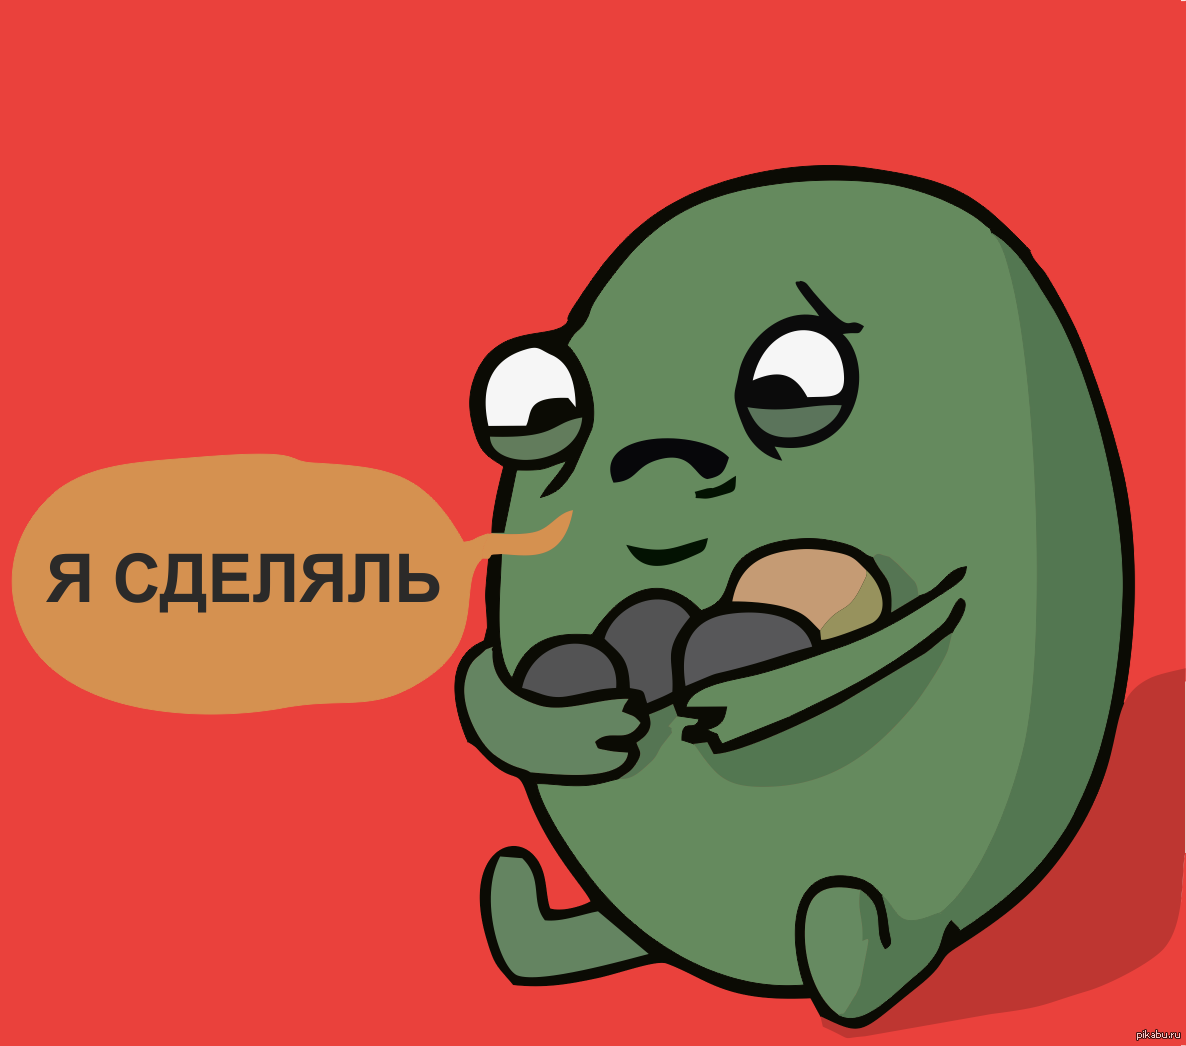

## 3

Пусть есть выборка из 11 элементов: $x_{(1)} < x_{(2)} < \dots < x_{(10)} < x_{(11)}$

Хотим бутстрапом оценить медиану

### 3.1

Покажите, что для оценки $\hat{\theta}$ выполняется $P(\hat{\theta} > x_{i}) = \sum_{j=0}^5 B_i\left(j, n, \frac{i}{n}\right)$, где $B_i(j, n, p) = C_{n}^j p^j (1-p)^{n-j}$


$\hat{\theta} > x_{i}$, значит что в бутстрапированной выборке $\hat{X}$ med$(\hat{X})  > x_{(i)}$, т. е.  $\hat{x}_{(6)} > x_{(i)}$, значит в бутстрапированной выборке не больше 5 элементов  $ \leqslant x_{(i)}$  

Покажем, что данная сумма значит ровно это:

Видим с в ней схему бернулли, где j - количество элементов  $\leqslant x_{(i)}$, попавших в бутстрапированную выборку, $p = \dfrac{i}{n}$ вероятность выбрать из выборки элемент $\leqslant x_{(i)}$, а $1 - \dfrac{i}{n}$ вероятность выбрать элемент больший $x_{(i)}$

Итого: суммируем по вероятностям, что в бустрапированную выборку попало ровно j элементов $\leqslant x_{(i)}$, где $j \in \{0, \dots 5\}$. То есть ровно то, что мы и хотели. Ура.



### 3.2

Покажем, что $P(\hat{\theta} = x_{(i)}) = \sum_{j=0}^5 B_i\left(j, n, \frac{i - 1}{n}\right) - \sum_{j=0}^5 B_i\left(j, n, \frac{i}{n}\right)$

Из прошлого пункта знаем, что $P(\hat{\theta} > x_{i}) = \sum_{j=0}^5 B_i\left(j, n, \frac{i}{n}\right)$

Тогда $P(\hat{\theta} = x_{(i)}) = \sum_{j=0}^5 B_i\left(j, n, \frac{i - 1}{n}\right) - \sum_{j=0}^5 B_i\left(j, n, \frac{i}{n}\right) = P(\hat{\theta} > x_{(i-1)}) - P(\hat{\theta} > x_{(i)}) =  P(\hat{\theta} = x_{(i)})$

### 3.3

Ищем 90% интервал:

Считаем:

$P(\hat{\theta} > x_{3}) = \sum_{j=0}^5  B_i\left(j, 11, \frac{3}{11}\right)$

$P(\hat{\theta} > x_{9}) = \sum_{j=0}^5  B_i\left(j, 11, \frac{9}{11}\right)$

In [4]:
def count_prob(i):
    prob = 0
    samples = 11
    p, neg_p = i / samples, (1 - i / samples)
    curr_pos, curr_neg = 1, neg_p**samples
    for j in range(6):
        prob += binom(samples, j) * curr_pos * curr_neg
        curr_pos *= p
        curr_neg /= neg_p
    return prob

In [6]:
print(count_prob(3), count_prob(9))
print(count_prob(3) - count_prob(9))

0.9487534039820793 0.007207117786652218
0.9415462861954271


Видим, что вероятность того, что наша оценка лежит между $x_{(4)}$ и $x_{(9)}$ 0.94, проверим, что если взять поуже, то интервал станет меньше 90%

In [7]:
print(count_prob(3) - count_prob(8))
print(count_prob(4) - count_prob(9))
print(count_prob(4) - count_prob(8))

0.8975068079641585
0.8200459443315162
0.7760064661002476


Искомый интервал: $[x_{(4)}, x_{(9)}]$

## 4

In [180]:
data = pd.read_csv('/Users/arinaruck/Downloads/galaxies.csv')
data.head()

,Unnamed: 0,dat
0,1,9172
1,2,9350
2,3,9483
3,4,9558
4,5,9775


Посмотрим, как вообще выглядит KDE

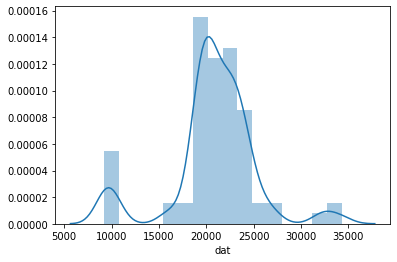

In [16]:
sns.distplot(data['dat'])

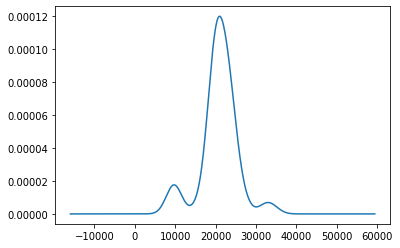

In [84]:
kernel = gaussian_kde(data['dat'])
plt.plot(x, kernel(x))

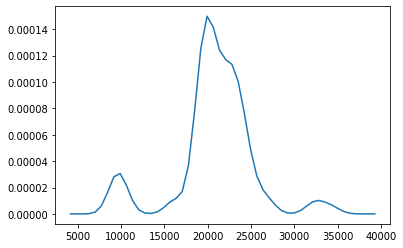

In [107]:
kde = KernelDensity(bandwidth=1000, kernel='gaussian')
kde.fit(data['dat'][:, None])
x = np.linspace(data['dat'].min() - 5000, data['dat'].max() + 5000)
logdens = kde.score_samples(x[:, None])

plt.plot(x, np.exp(logdens))

## 4.1

Ищем минимальное h, при котором выборка унимодальна

Считаем, что x мода, если в соседних точках плотность меньше

min_h: 3048.5745473066863


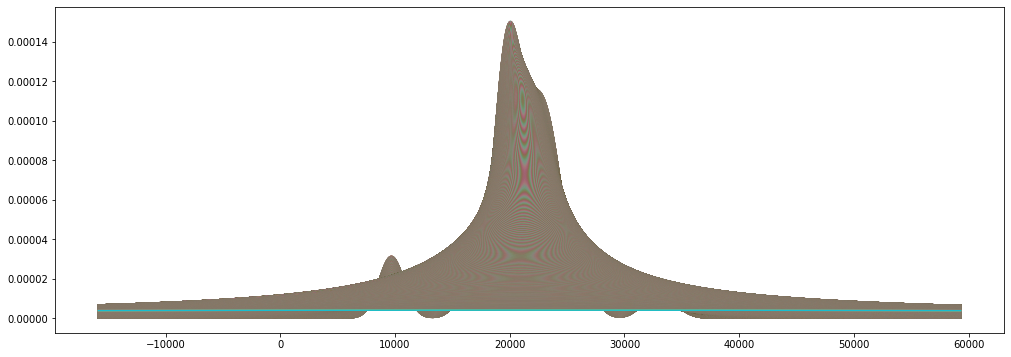

In [182]:
dif = data['dat'].max() - data['dat'].min()

def count_modes(data, h, if_plot=True):
    kde = KernelDensity(bandwidth=h, kernel='gaussian')
    kde.fit(data.reshape(-1, 1))
    x = np.linspace(data.min() - dif, data.max() + dif, 1000)
    pdf = np.exp(kde.score_samples(x.reshape(-1, 1)))
    pdf_m, pdf_p, pdf = pdf[: -2], pdf[2 :], pdf[1 : -1]
    pdf_m = pdf - pdf_m
    pdf_p = pdf - pdf_p
    if if_plot:
        plt.plot(x[1:-1], pdf)
    return np.logical_and(pdf_m > 0, pdf_p > 0).sum()
    
plt.figure(figsize=(17, 6))

min_h = 0
hs = np.logspace(3, 5, 5000)
for h in hs:
    modes = count_modes(np.array(data['dat']), h)
    if min_h == 0 and modes == 1:
        min_h = h
print('min_h:', min_h)

### 4.2

Хотим семплировать бутстрепную выборку из $X* \sim a + b(X + \hat{h}_{min} \mathcal{N}(0, 1))$, выбрав a и b так, что дисперсия и ожидание сохраняются

Найдем такие a, b:

$EX = E (a + b(X + \hat{h}_{min} \mathcal{N}(0, 1))) = a + b EX$

$VarX = Var(a + b(X + \hat{h}_{min} \mathcal{N}(0, 1))) = b^2 Var X  + b^2 \hat{h}_{min}^2 $


$b = \sqrt{\dfrac{Var X}{Var X + h_{min}^2}}$


$a = \left(1 -  \sqrt{\dfrac{Var X}{Var X + h_{min}^2}} \right) E X$

In [184]:
var  = data['dat'].var()
b = np.sqrt(var / (var + min_h**2))
a = (1 - b) * data['dat'].mean()
print(a, b)

3508.722939493146 0.8315395535839488


$P(h_{uni} > \hat{h}_{uni}) \approx \dfrac{1}{B}\sum_{b}P(\hat{h}_{uni}^b > \hat{h}_{uni})$

In [14]:
B, n = 10000, len(data.index)
events = 0
for i in tqdm_notebook(range(B)):
    X = choice(data['dat'], size=n).astype('float64')
    X += min_h * np.random.normal(size=n)
    X = a + b * X
    modes = count_modes(X, min_h, False)
    events += (modes > 1) % 2
print(events / B)


0.0093


### 4.3

У нас нулевая гипотеза, что нет пустот и супер кластеров, то есть распределение унимодально.

P(multimodal) = $P(h_{uni} > \hat{h}_{uni}) < \alpha$, если больше, то мультимодально, значит отвергаем

Если у нас уровень значимости <= полученной вероятности, то отвергаем

## 5

In [4]:
hiv_data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/boot/cd4.csv')
hiv_data.head()

,Unnamed: 0,baseline,oneyear
0,1,2.12,2.47
1,2,4.35,4.61
2,3,3.39,5.26
3,4,2.51,3.02
4,5,4.04,6.36


Посчитаем корреляцию Пирсона между данными до и после лечения

In [100]:
corr_true, _ = pearsonr(hiv_data['baseline'], hiv_data['oneyear'])
print(corr_true)

0.72316536789203


### 5.1

Хотим понастроить 95% доверительные интервалы

In [93]:
B, n, alpha = 10000, len(hiv_data.index), 0.05
corrs, ts = [], []

for b in range(B):
    idx = choice(list(range(n)), size=n)
    X = hiv_data.iloc[idx][['baseline', 'oneyear']]
    corr_b, _ = pearsonr(X['baseline'], X['oneyear'])
    std_b = np.sqrt((1 - corr_b**2) / (n-2))
    corrs.append(corr_b)
    ts.append((corr_b - corr_true) / std_b)
corrs = np.array(corrs)
corr_low, corr_high = np.quantile(corrs, q=alpha/2), np.quantile(corrs, q=1-alpha/2)
z_low, z_high = norm.interval(1-alpha) 
t_low, t_high = np.quantile(ts, q=alpha/2), np.quantile(corrs, q=1-alpha/2)
std = corrs.std()

**Центральный интервал**

$$\left(2*\hat{corr} - \hat{corr}^{1 - \alpha/2}, 2*\hat{corr} - \hat{corr}^{\alpha/2}\right)$$

**Квантильный интервал**

$$\left(\hat{corr}^{\alpha/2}, \hat{corr}^{1 - \alpha/2}\right)$$

**Нормальный интервал**

$$\left(\hat{corr} - z_{\alpha/2}\hat{std}, \hat{corr} + z_{\alpha/2}\hat{std}\right)$$

**bootstrap-t интервал**


$$\left(\hat{corr} - t^{\alpha/2}\hat{std}, \hat{corr} + t^{\alpha/2}\hat{std}\right)$$


Где $t_b = \dfrac{corr_b - \hat{corr}}{\hat{\sigma(corr)}}$


$\sigma(corr) = \sqrt{\dfrac{1-corr^2}{n-2}}$

In [94]:
print('Центральный интервал:\t ({:.3f}, {:.3f})'.format(2 * corr_true  - corr_high, 2 * corr_true - corr_low))
print('Квантильный интервал:\t ({:.3f}, {:.3f})'.format(corr_low, corr_high))
print('Нормальный интервал:\t ({:.3f}, {:.3f})'.format(corr_true - z_high * std, corr_true - z_low * std))
print('bootstrap-t интервал:\t ({:.3f}, {:.3f})'.format(corr_true - t_high * std,  corr_true - t_low * std))

Центральный интервал:	 (0.585, 0.944)
Квантильный интервал:	 (0.502, 0.861)
Нормальный интервал:	 (0.543, 0.903)
bootstrap-t интервал:	 (0.644, 0.822)


In [36]:
print(std)

0.09269553422473505


Добавим преобразование $f(r) = \dfrac{1}{2} log\left(\dfrac{1 + r}{1 - r} \right)$

И обратное: $f^{-1}(s) = f^{-1}\left( \dfrac{1}{2} log\left(\dfrac{1 + r}{1 - r} \right)\right)  = r$


$\dfrac{1}{2} log\left(\dfrac{1 + r}{1 - r} \right) = s$

$\dfrac{1 + r}{1 - r} = e^{2s}$

$r(1 + e^{2s}) = (e^{2s} - 1)$

$r = \dfrac{(e^{2s} - 1)}{(e^{2s} + 1)} = f^{-1}(s)$

In [95]:
def f(r):
    return 0.5 * np.log((1 + r) / (1 - r))

def f_inv(s):
    return (np.exp(2*s) - 1) / (np.exp(2*s) + 1)
corrs, ts = [], []

corr_f = f(corr_true)

for b in range(B):
    idx = choice(list(range(n)), size=n)
    X = hiv_data.iloc[idx][['baseline', 'oneyear']]
    corr_b, _ = pearsonr(X['baseline'], X['oneyear'])
    #corr_b = f(corr_b)
    #std_b = np.sqrt(1 / (n-3))
    corrs.append(corr_b)
    #ts.append((corr_b - corr_f) / std_b)
corrs = f(np.array(corrs))
ts = (corrs - corr_f) * np.sqrt(n-3) 
corr_low, corr_high = np.quantile(corrs, q=alpha/2), np.quantile(corrs, q=1-alpha/2)
z_low, z_high = norm.interval(1-alpha) 
t_low, t_high = np.quantile(ts, q=alpha/2), np.quantile(corrs, q=1-alpha/2)
std = corrs.std()

In [96]:
print('Центральный интервал:\t ({:.3f}, {:.3f})'.format(f_inv(2 * corr_f  - corr_high), f_inv(2 * corr_f - corr_low)))
print('Квантильный интервал:\t ({:.3f}, {:.3f})'.format(f_inv(corr_low), f_inv(corr_high)))
print('Нормальный интервал:\t ({:.3f}, {:.3f})'.format(f_inv(corr_f - z_high * std), f_inv(corr_f - z_low * std)))
print('bootstrap-t интервал:\t ({:.3f}, {:.3f})'.format(f_inv(corr_f - t_high * std),  f_inv(corr_f - t_low * std)))

Центральный интервал:	 (0.486, 0.855)
Квантильный интервал:	 (0.504, 0.861)
Нормальный интервал:	 (0.494, 0.858)
bootstrap-t интервал:	 (0.583, 0.833)


Реально более согласованные, класс!

### 5.2

Теперь отклонение тоже считаем бутстрапом

In [170]:
B, n, alpha = 2000, len(hiv_data.index), 0.05
corrs, ts = [], []
std_ests, std_bs = [], []

for b in tqdm_notebook(range(B)):
    std_corrs = []
    idx = choice(list(range(n)), size=n)
    X = hiv_data.iloc[idx][['baseline', 'oneyear']]
    corr_b, _ = pearsonr(X['baseline'], X['oneyear'])
    corrs.append(corr_b)
    std_est = np.sqrt((1 - corr_b**2) / (n-2))
    for j in range(B):
        std_idx = choice(list(range(n)), size=n)
        std_X = X.iloc[std_idx]
        std_corr_b, _ = pearsonr(std_X['baseline'], std_X['oneyear'])
        std_corrs.append(std_corr_b)
    std_b = np.array(std_corrs).std()
    std_ests.append(std_est)
    std_bs.append(std_b)
    ts.append((corr_b - corr) / std_b)
corrs = np.array(corrs)
corr_low, corr_high = np.quantile(corrs, q=alpha/2), np.quantile(corrs, q=1-alpha/2)
z_low, z_high = norm.interval(1-alpha) 
t_low, t_high = np.quantile(ts, q=alpha/2), np.quantile(corrs, q=1-alpha/2)
std = corrs.std()

In [178]:
B, n, alpha = 10000, len(hiv_data.index), 0.05
corrs, ts = [], []

for b in tqdm_notebook(range(B)):
    idx = choice(list(range(n)), size=n)
    X = hiv_data.iloc[idx][['baseline', 'oneyear']]
    corr_b, _ = pearsonr(X['baseline'], X['oneyear'])
    std_est = np.sqrt((1 - corr_b**2) / (n-2))
    corrs.append(corr_b)
    corrs_std = []
    for i in range(100):
        idx = choice(list(range(n)), size=n)
        X_bootstap = X.iloc[idx]
        corr_bootstrap, _ = pearsonr(X_bootstap['baseline'], X_bootstap['oneyear'])
        corrs_std.append(corr_bootstrap)
    std_b = np.array(corrs_std).std()
    ts.append((corr_b - corr_true) / std_b)
corrs = np.array(corrs)
corr_low, corr_high = np.quantile(corrs, q=alpha/2), np.quantile(corrs, q=1-alpha/2)
z_low, z_high = norm.interval(1-alpha) 
t_low, t_high = np.quantile(ts, q=alpha/2), np.quantile(corrs, q=1-alpha/2)
std = corrs.std()

In [177]:
print('Центральный интервал:\t ({:.3f}, {:.3f})'.format(2 * corr_true  - corr_high, 2 * corr_true - corr_low))
print('Квантильный интервал:\t ({:.3f}, {:.3f})'.format(corr_low, corr_high))
print('Нормальный интервал:\t ({:.3f}, {:.3f})'.format(corr_true - z_high * std, corr_true - z_low * std))
print('bootstrap-t интервал:\t ({:.3f}, {:.3f})'.format(corr_true - t_high * std, corr_true - t_low * std))

Центральный интервал:	 (0.584, 0.947)
Квантильный интервал:	 (0.500, 0.863)
Нормальный интервал:	 (0.544, 0.902)
bootstrap-t интервал:	 (0.644, 0.901)


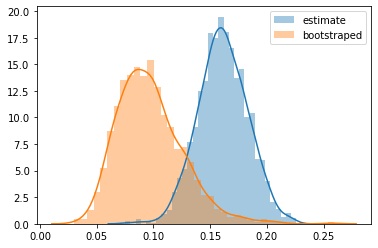

In [68]:
sns.distplot(std_ests, label='estimate')
sns.distplot(std_bs, label='bootstraped')
plt.legend();

Видим, что оценка и бутстрапированная дисперсия сильно отличается (бутстрапированная меньше $\implies$ интервал расширился)

### 5.3

Jacknife бутстрап строится на leave-one-out статистиках, т.е. статистиках посчитанных на всех измерениях кроме одного:

$$\hat{\theta}_{(-i)} = \theta(X_{(-i)})$$$$\hat{\theta}_{(\cdot)} = \frac{1}{N} \sum\limits_{i=1}^{N} \hat{\theta}_{(-i)}$$

Хотим найти bias 

$$bias = (n-1)(\hat{\theta}_{(\cdot)}  - \hat{\theta})$$

In [489]:
mask = np.ones(n)
corr_b_sum = 0
idx = np.arange(n)
for i in range(n):
    X = hiv_data.iloc[np.delete(idx, i)][['baseline', 'oneyear']]
    corr_b_sum += pearsonr(X['baseline'], X['oneyear'])[0]
    mask[i] = 1
corr_b_avg = corr_b_sum / n
print(corr_b_avg)
bias = (n-1)*(corr_b_avg - corr_true)
print('bias: {:.5f}'.format(bias))

0.7228083000901783
bias: -0.00678


## 6


In [492]:
car_data = pd.read_table('https://raw.githubusercontent.com/SchattenGenie/hse-stats-course-2019/master/homeworks/hw_4/car_reduced.table')
car_data.head()

/Users/arinaruck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,purchase,income
0,1.0,72.0
1,0.0,19.0
2,0.0,23.0
3,0.0,33.0
4,1.0,60.0


### 6.1 

Ищем проблему

In [410]:
from sklearn.linear_model import LogisticRegression

In [411]:
logreg = LogisticRegression(penalty='none', solver='lbfgs')
d_min, d_max =  car_data['income'].min(),  car_data['income'].max()
logreg.fit(((car_data['income'] - d_min) / (d_max - d_min)) .values.reshape(-1, 1), car_data['purchase']);

In [412]:
w_opt, b_opt = logreg.coef_[0][0], logreg.intercept_[0]
print(w_opt, b_opt)

188.36038514927557 -60.81196590771384


In [413]:
logreg.predict(((car_data['income'] - d_min) / (d_max - d_min)).values.reshape(-1, 1))

array([1., 0., 0., 0., 1., 1., 0., 1., 0., 1.])

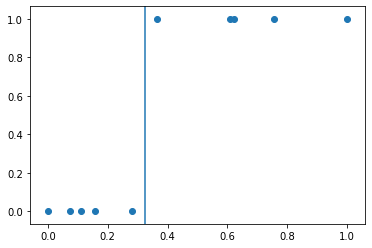

In [414]:
plt.scatter((car_data['income'] - d_min) / (d_max - d_min), car_data['purchase'])
plt.axvline(-logreg.intercept_[0] / logreg.coef_[0][0])

In [493]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X, y = scaler.fit_transform(car_data['income'].values.reshape(-1, 1)), car_data['purchase'].values
print(X.shape,y.shape)

(10, 1) (10,)


Видим, что выборка линейно разделима

Помним, что логарифмическая функция правдоподобия совпадает с функцией потерь (с точностью до знака):

$L = \dfrac{1}{n}\left( \sum_{i} [y_i = 1] log \dfrac{1}{1 + exp{(-wx_i - b)}}\right) + \sum_{i} [y_i = 0] log \left(1 -\dfrac{1}{1 + exp{(-wx_i - b)}}\right)$ 

In [416]:
def find_likelihood(X, y, w, b):
    X = X.reshape(-1, )
    e = np.exp(-(w*X + b))
    prob_p = np.log(1 / (1 + e))
    prob_n = np.log(e / (1 + e))
    likelihood = (y * prob_p + (1 - y) * prob_n).sum()
    return likelihood


In [417]:
ws = np.arange(-20, 100, 1)
bs = np.arange(-20, 20, 1)
profile_likelihood_w = []
for w in ws:
    max_likelihood = -1e7
    for b in bs:
         max_likelihood = max(max_likelihood, find_likelihood(X, y, w, b))
    profile_likelihood_w.append(max_likelihood)

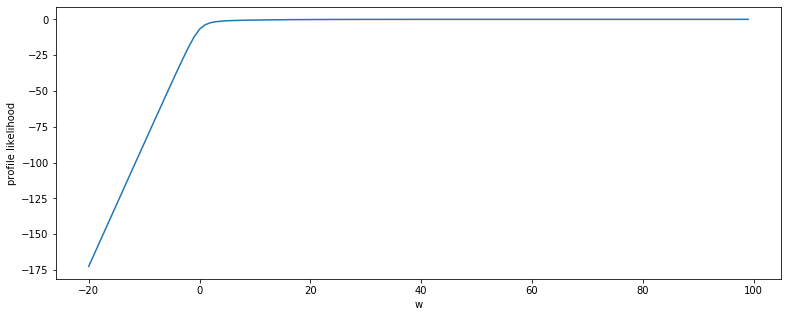

In [418]:
plt.figure(figsize=(13, 5))
plt.xlabel('w')
plt.ylabel('profile likelihood')
plt.plot(ws, profile_likelihood_w);

In [419]:
ws = np.arange(-20, 100, 1)
bs = np.arange(-20, 20, 1)
profile_likelihood_b = []
for b in bs:
    max_likelihood = -1e7
    for w in ws:
         max_likelihood = max(max_likelihood, find_likelihood(X, y, w, b))
    profile_likelihood_b.append(max_likelihood)

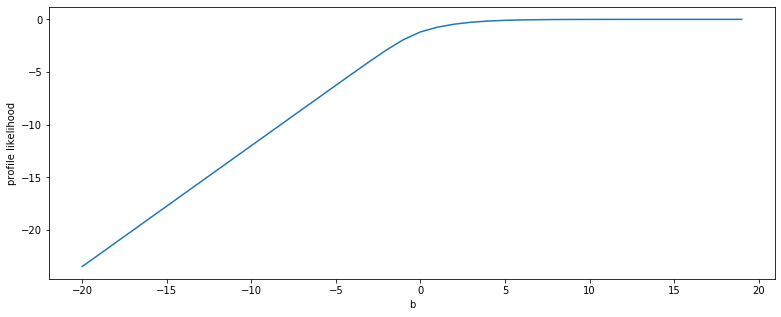

In [420]:
plt.figure(figsize=(13, 5))
plt.xlabel('b')
plt.ylabel('profile likelihood')
plt.plot(bs, profile_likelihood_b);

Проблема, что с ростом w (и b) правдоподобие увеличивается, значит лосс падает, значит мы либо не сойдемся, либо градиенты затухнут и мы сойдемся к большим весам (поэтому нам и нужна регуляризация) 

### 6.2

$log L*(\beta) = log L(\beta) + \dfrac{1}{2} log(det I(\beta))$

$I(\beta) = X^T W X$


$W = diag(\hat{y_i} (1 - \hat{y_i}))$



In [426]:
def find_firth_likelihood(X, y, w, b):
    X, n = X.reshape(-1, ), len(y)
    e = np.exp(-(w*X + b))
    prob_p = 1 / (1 + e)
    prob_n = e / (1 + e)
    likelihood = (y * np.log(prob_p) + (1 - y) * np.log(prob_n)).sum()
    W = np.zeros((n, n))
    np.fill_diagonal(W, prob_p * prob_n)
    I = np.dot(np.dot(X.T, W), X)
    likelihood += 0.5 * np.log(I)
    return likelihood


In [429]:
ws = np.arange(0, 100, 1)
bs = np.arange(0, 20, 1)
profile_likelihood_firth_w = []
for w in ws:
    max_likelihood = -np.inf
    for b in bs:
        max_likelihood = max(max_likelihood, find_firth_likelihood(X, y, w, b))
    profile_likelihood_firth_w.append(max_likelihood)

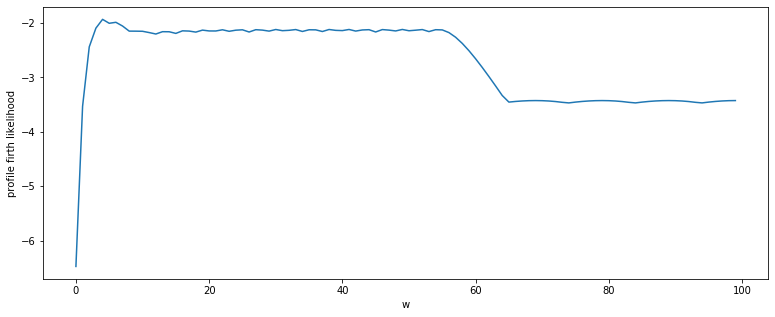

In [430]:
plt.figure(figsize=(13, 5))
plt.xlabel('w')
plt.ylabel('profile firth likelihood')
plt.plot(ws, profile_likelihood_firth_w);

In [433]:
ws = np.arange(0, 100, 1)
bs = np.arange(0, 20, 1)
profile_likelihood_firth_b = []
for b in bs:
    max_likelihood = -1e7
    for w in ws:
         max_likelihood = max(max_likelihood, find_firth_likelihood(X, y, w, b))
    profile_likelihood_firth_b.append(max_likelihood)

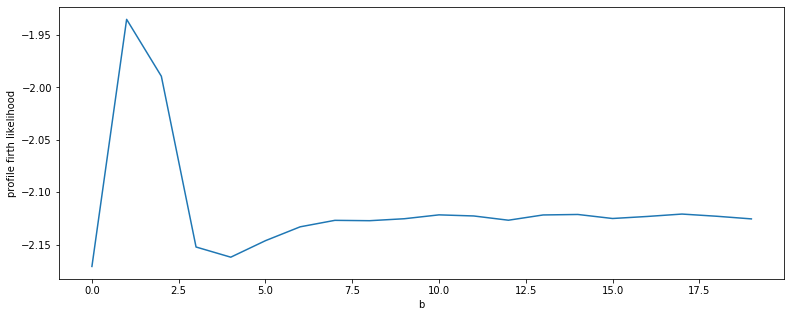

In [434]:
plt.figure(figsize=(13, 5))
plt.xlabel('b')
plt.ylabel('profile firth likelihood')
plt.plot(bs, profile_likelihood_firth_b);

Добавили в лайклихуд регуляризацию, стало норм

Ура)

In [494]:
print(w_opt, b_opt)
print(find_likelihood(X, y, w_opt, b_opt))
print(find_firth_likelihood(X, y, w_opt, b_opt))

188.36038514927557 -60.81196590771384
-79.6530219399824
-112.69307279215059


### 6.3

In [435]:
cars = pd.read_table('/Users/arinaruck/Desktop/cs/ml/hw/car.table')

/Users/arinaruck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [436]:
cars.head()

,purchase,income,age
0,0.0,32.0,3.0
1,0.0,45.0,2.0
2,1.0,60.0,2.0
3,0.0,53.0,1.0
4,0.0,25.0,4.0


In [455]:
X, y = scaler.fit_transform(cars['income'].values.reshape(-1, 1)), cars['purchase'].values

### Без регуляризации

In [456]:
ws = np.arange(-10, 50, 0.1)
bs = np.arange(-10, 10, 0.1)
profile_likelihood_w = []
best_bs = []
for w in ws:
    max_likelihood = -1e7
    for b in bs:
         max_likelihood = max(max_likelihood, find_likelihood(X, y, w, b))
    profile_likelihood_w.append(max_likelihood)

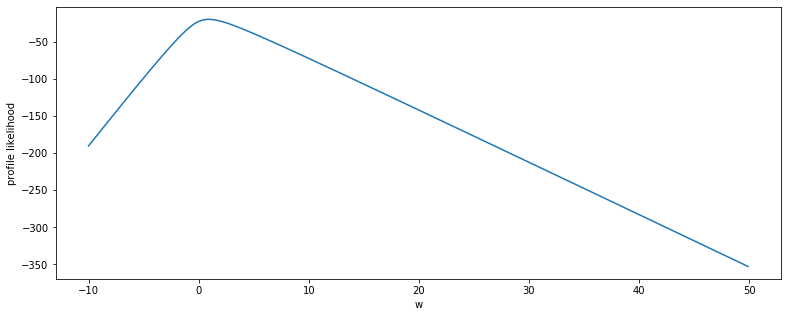

In [457]:
plt.figure(figsize=(13, 5))
plt.xlabel('w')
plt.ylabel('profile likelihood')
plt.plot(ws, profile_likelihood_w);

In [459]:
ws = np.arange(-5, 5, 0.01)
bs = np.arange(-5, 5, 0.01)
profile_likelihood_b = []
max_ws = []
for b in bs:
    max_likelihood = -np.inf
    max_w = 0
    for w in ws:
        l = find_likelihood(X, y, w, b)
        if (max_likelihood  < l):
            max_likelihood = max(max_likelihood, find_likelihood(X, y, w, b))
            max_w = w
    max_ws.append(max_w)
    profile_likelihood_b.append(max_likelihood)
idx = np.argmax(profile_likelihood_b)
print('best coefficients: w={:.3f}, b={:.3f}'.format(max_ws[idx], bs[idx]))

best coefficients: w=0.920, b=-0.320


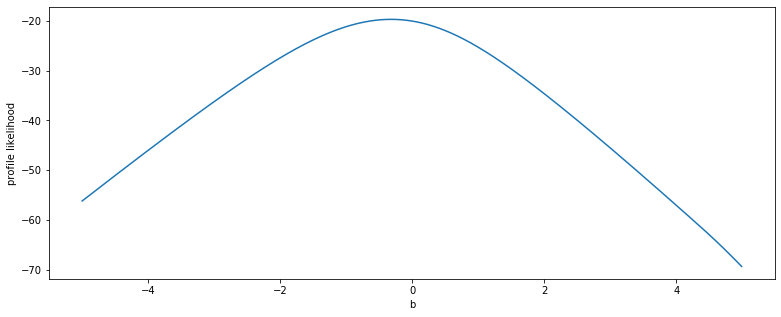

In [462]:
plt.figure(figsize=(13, 5))
plt.xlabel('b')
plt.ylabel('profile likelihood')
plt.plot(bs, profile_likelihood_b);

### С регуляризацией

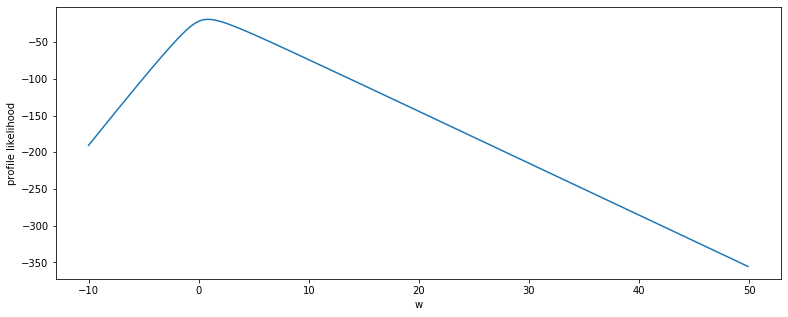

In [463]:
ws = np.arange(-10, 50, 0.1)
bs = np.arange(-10, 10, 0.1)
profile_likelihood_w = []
best_bs = []
for w in ws:
    max_likelihood = -1e7
    for b in bs:
         max_likelihood = max(max_likelihood, find_firth_likelihood(X, y, w, b))
    profile_likelihood_w.append(max_likelihood)

plt.figure(figsize=(13, 5))
plt.xlabel('w')
plt.ylabel('profile likelihood')
plt.plot(ws, profile_likelihood_w);

best coefficients: w=0.820, b=-0.330


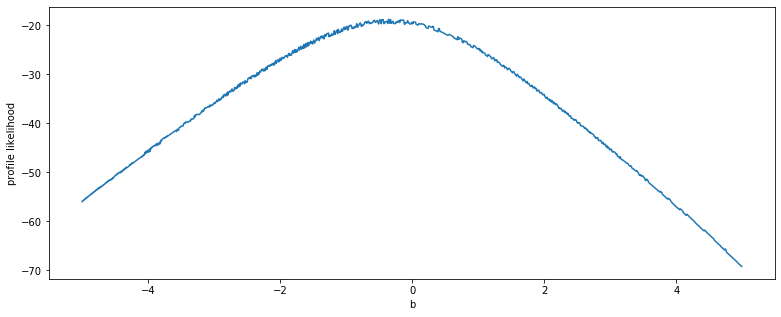

In [466]:
ws = np.arange(-5, 5, 0.01)
bs = np.arange(-5, 5, 0.01)
profile_likelihood_b = []
max_ws = []
for b in bs:
    max_likelihood = -np.inf
    max_w = 0
    for w in ws:
        l = find_likelihood(X, y, w, b)
        if (max_likelihood  < l):
            max_likelihood = max(max_likelihood, find_firth_likelihood(X, y, w, b))
            max_w = w
    max_ws.append(max_w)
    profile_likelihood_b.append(max_likelihood)
idx = np.argmax(profile_likelihood_b)
print('best coefficients: w={:.3f}, b={:.3f}'.format(max_ws[idx], bs[idx]))

plt.figure(figsize=(13, 5))
plt.xlabel('b')
plt.ylabel('profile likelihood')
plt.plot(bs, profile_likelihood_b);

In [467]:
lr = LogisticRegression(penalty='none', solver='lbfgs')
lr.fit(X, y)
print('unregularized: w = {:.2f}, b={:.2f}'.format(lr.coef_[0][0], lr.intercept_[0]))
lr_reg = LogisticRegression()
lr_reg.fit(X, y)
print('regularized: w = {:.2f}, b={:.2f}'.format(lr_reg.coef_[0][0], lr_reg.intercept_[0]))

unregularized: w = 0.92, b=-0.32
regularized: w = 0.78, b=-0.28


/Users/arinaruck/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Теперь максимум находится даже без регуляризации

А оптимальные коэффициенты похожи на sklearn (ура)

In [469]:
cars.head()

,purchase,income,age
0,0.0,32.0,3.0
1,0.0,45.0,2.0
2,1.0,60.0,2.0
3,0.0,53.0,1.0
4,0.0,25.0,4.0


### 6.4

Обучим двухфакторный логрег

In [470]:
lr = LogisticRegression()
lr.fit(cars[['income', 'age']], y)
print('regularized: w = {:.2f}, b={:.2f}'.format(lr.coef_[0][0], lr.intercept_[0]))

regularized: w = 0.03, b=-1.12


/Users/arinaruck/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 6.5

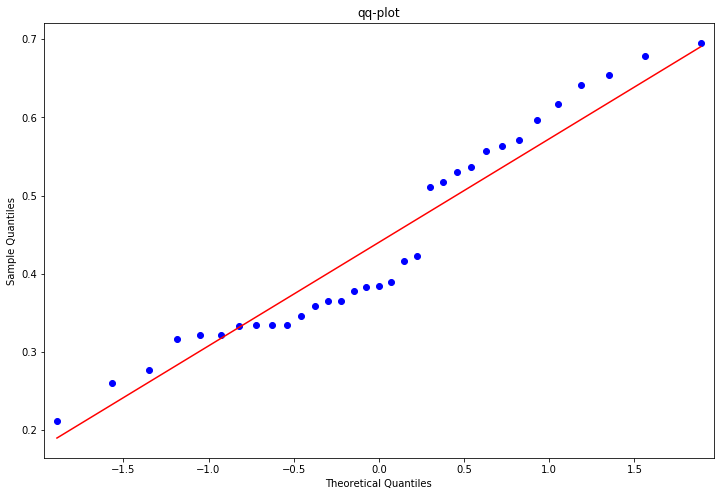

In [479]:
import statsmodels.api as sm

fig = sm.qqplot(abs(y - lr.predict_proba(cars[['income', 'age']])[:, 1]), line='s')
fig.set_figheight(8)
fig.set_figwidth(12)
plt.title("qq-plot")
plt.show()

По графику видно, остатки близки к нормальным

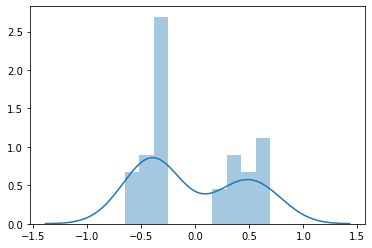

In [487]:
sns.distplot(y - lr.predict_proba(cars[['income', 'age']])[:, 1], bins=10);

При этом тут можем заметить, что ошибки кучкуются около 0.5 и -0.5, значит наша модель неуверенная

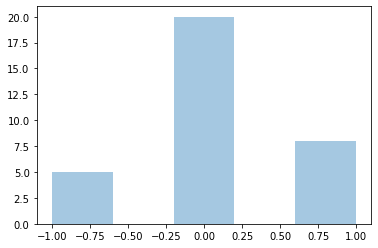

In [486]:
sns.distplot(y - lr.predict(cars[['income', 'age']]), kde=False, bins=5);

А тут видим, что она еще и ошибается часто. Не очень :(